<a href="https://colab.research.google.com/github/grjadhav409/ATG4B-inhibitors-prediction-using-ML/blob/main/2_8__Improving_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### lib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

### x and y

In [ ]:
#load X and Y
df1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/X_padel.csv")
df2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/y_pic50.csv")

#combine X and Y 
df4= pd.concat([df1,df2],axis=1)

#remove unnamed column
df5 = df4.loc[:,~df4.columns.str.match("Unnamed")]

# Replace to drop rows or columns infinite values
df6 = df5.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#reset index
df7= df6.reset_index()
df7 = df7.loc[:,~df7.columns.str.match("index")]


# define X and Y
X = df7.drop("pIC50", axis=1)
X=X.astype('int')
Y= df7["pIC50"]
Y=Y.astype('float')

X

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,36,42,12,12,34,26,8,...,0,0,0,0,0,0,0,0,0,0
1,0,-1,2,59,60,11,11,54,26,28,...,0,0,0,0,0,0,0,0,0,0
2,0,-1,1,14,33,12,13,26,17,9,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,80,65,12,17,51,30,21,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,41,58,17,17,47,27,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0,0,0,57,66,16,17,54,33,21,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,49,58,12,12,51,28,23,...,0,0,0,0,0,0,0,0,0,0
240,0,-1,3,44,55,12,12,48,27,21,...,0,0,0,0,0,0,0,0,0,0
241,0,-2,4,37,69,26,35,54,38,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(df7['pIC50'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df7.drop('pIC50', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (182, 2756)
Training Labels Shape: (182,)
Testing Features Shape: (61, 2756)
Testing Labels Shape: (61,)


## Data Preparation

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (182, 2756)
Training Labels Shape: (182,)
Testing Features Shape: (61, 2756)
Testing Labels Shape: (61,)


## Establish baseline

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'pIC50 value')

Mean Absolute Error: 0.34 pIC50 value


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.21 %.


## Train on Expanded Data and Features

In [ ]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(train_features, train_labels);

## Metrics for Expanded Data and Features

In [ ]:
# Make predictions on test data
predictions = rf_exp.predict(test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / test_labels))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 0.3367 degrees.
Accuracy: 93.21 %.


# Feature Reduction

From previous experience and the graphs produced at the beginning, we know that some features are not useful for our pIC50 prediction problem. To reduce the number of features, which will reduce runtime, hopefully without significantly reducing performance, we can examine the feature importances from the random forest.

### Feature Importances

In [ ]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#### Visualize Feature Importances

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

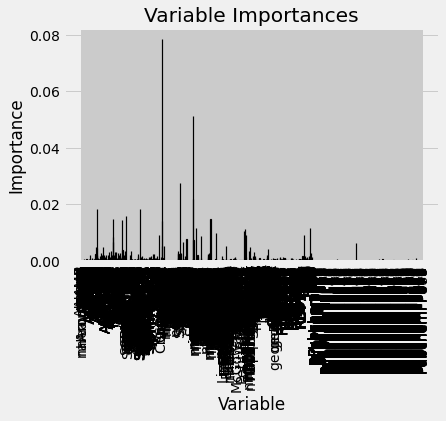

In [ ]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

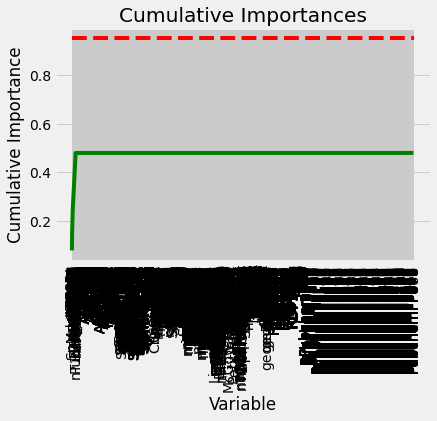

In [ ]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### Limit Number of Features 

We will now reduce the number of features in use by the model to only those required to account for 95% of the importance. 
The same number of features must be used in the training and testing sets.

In [ ]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:31]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)


Important train features shape: (182, 31)
Important test features shape: (61, 31)


In [ ]:
feature_importances[0:31]

[('VE1_Dt', 0.08),
 ('minHBint5', 0.05),
 ('SHssNH', 0.03),
 ('ATSC3c', 0.02),
 ('GATS5s', 0.02),
 ('SpMax1_Bhm', 0.02),
 ('minHBint3', 0.02),
 ('AATS0s', 0.01),
 ('MATS4c', 0.01),
 ('MATS5c', 0.01),
 ('MATS2m', 0.01),
 ('GATS1e', 0.01),
 ('AVP-0', 0.01),
 ('VE2_Dt', 0.01),
 ('VE3_Dt', 0.01),
 ('nHBint5', 0.01),
 ('SssCH2', 0.01),
 ('SsOm', 0.01),
 ('minHBint7', 0.01),
 ('minHCsats', 0.01),
 ('minsOm', 0.01),
 ('maxHCsats', 0.01),
 ('maxsOm', 0.01),
 ('ETA_Shape_Y', 0.01),
 ('nFRing', 0.01),
 ('nF11Ring', 0.01),
 ('nT11Ring', 0.01),
 ('nT11HeteroRing', 0.01),
 ('L3m', 0.01),
 ('Dp', 0.01),
 ('PubchemFP346', 0.01)]

### Training on Important Features

In [ ]:
# Train the expanded model on only the important features
rf_exp.fit(important_train_features, train_labels);

### Evaluate on Important features

In [ ]:
# Make predictions on test data
predictions = rf_exp.predict(important_test_features)

# Performance metrics
errors = abs(predictions - test_labels)

print('Average absolute error:', round(np.mean(errors), 4), 'pIC50')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average absolute error: 0.3431 pIC50
Accuracy: 93.06 %.


Using only the 31 most important features (instead of all 2756) results in a minor decrease in accuracy by 0.17. For some models, decreasing the number of features can increase performance and therefore should be done. However, in other situations, performance will decrease but run time will also decrease. The final decision on how many features to retain will therefore be a trade-off between accuracy and run time. 

## Compare Trade-Offs

In [ ]:
# Use time library for run time evaluation
import time

# All features training and testing time
all_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features, train_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features total training and testing time:', round(all_features_time, 2), 'seconds.')

All features total training and testing time: 111.3 seconds.


In [ ]:
# Time training and testing for reduced feature set
reduced_features_time = []

# Do 10 iterations and take average
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(important_train_features, train_labels)
    reduced_features_predictions = rf_exp.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('Reduced features total training and testing time:', round(reduced_features_time, 2), 'seconds.')

Reduced features total training and testing time: 3.06 seconds.


### Accuracy vs Run-Time

In [ ]:
all_accuracy =  100 * (1- np.mean(abs(all_features_predictions - test_labels) / test_labels))
reduced_accuracy = 100 * (1- np.mean(abs(reduced_features_predictions - test_labels) / test_labels))

comparison = pd.DataFrame({'features': ['all (17)', 'reduced (5)'], 
                           'run_time': [round(all_features_time, 2), round(reduced_features_time, 2)],
                           'accuracy': [round(all_accuracy, 2), round(reduced_accuracy, 2)]})

comparison[['features', 'accuracy', 'run_time']]

,features,accuracy,run_time
0,all (17),93.21,111.30
1,reduced (5),93.06,3.06


In [ ]:
relative_accuracy_decrease = 100 * (all_accuracy - reduced_accuracy) / all_accuracy
print('Relative decrease in accuracy:', round(relative_accuracy_decrease, 3), '%.')

relative_runtime_decrease = 100 * (all_features_time - reduced_features_time) / all_features_time
print('Relative decrease in run time:', round(relative_runtime_decrease, 3), '%.')

Relative decrease in accuracy: 0.155 %.
Relative decrease in run time: 97.249 %.


## improve accuracy

In [ ]:
# Use only the most important features
train_features = important_train_features[:]
test_features = important_test_features[:]

# Update feature list for visualizations
feature_list = important_feature_names[:]

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_exp.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Search with Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

### evaluate function

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

Evaluate the Default Model

In [ ]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_features, train_labels)
evaluate(base_model, test_features, test_labels)

Evaluate the Best Random Search Model

In [ ]:
best_random = rf_random.best_estimator_
evaluate(best_random, test_features, test_labels)